### Лабораторная работа №1. Предварительная обработка данных.

Выполнил: Кучумов Михаил 18-ИВТ-3  
Вариант №3. Вторичный рынок машин.

### Задание:

1. Удалите столбцы, ценность которых для оценки стоимости машины низка.
2. Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.
3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.
4. Заполнить пропущенные данные в строковых полях.
5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.
6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.
7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.
8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.
9. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [2]:
import pandas as pd

In [3]:
autos_df = pd.read_csv("autos.csv", encoding='iso-8859-1')
autos_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


## 1. Удалите столбцы, ценность которых для оценки стоимости машины низка.

In [41]:
autos_drop_df = autos_df.drop(['dateCrawled', 'seller', 'offerType', 'abtest', 'vehicleType', 'monthOfRegistration', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen'], axis = 1)
autos_drop_df

,name,price,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,1993,manuell,0,golf,150000,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,2011,manuell,190,NaN,125000,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,2004,automatik,163,grand,125000,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,2008,manuell,69,fabia,90000,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,2200,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN
371524,Smart_smart_leistungssteigerung_100ps,1199,2000,automatik,101,fortwo,125000,benzin,smart,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,1996,manuell,102,transporter,150000,diesel,volkswagen,nein
371526,VW_Golf_Kombi_1_9l_TDI,3400,2002,manuell,100,golf,150000,diesel,volkswagen,NaN


## 2. Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.

In [66]:
raws_before = len(autos_df.index)
print('Строк до удаления: ' + str(raws_before + 1))

Строк до удаления: 371529


In [42]:
autos_droppedExcess_df = autos_drop_df.dropna()
autos_droppedExcess_df

,name,price,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
3,GOLF_4_1_4__3TÜRER,1500,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,2008,manuell,69,fabia,90000,diesel,skoda,nein
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,1995,manuell,102,3er,150000,benzin,bmw,ja
6,Peugeot_206_CC_110_Platinum,2200,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein
7,VW_Derby_Bj_80__Scheunenfund,0,1980,manuell,50,andere,40000,benzin,volkswagen,nein
...,...,...,...,...,...,...,...,...,...,...
371521,Opel_Zafira_1.6_Elegance_TÜV_12/16,1150,2000,manuell,0,zafira,150000,benzin,opel,nein
371522,Mitsubishi_Cold,0,2005,manuell,0,colt,150000,benzin,mitsubishi,ja
371524,Smart_smart_leistungssteigerung_100ps,1199,2000,automatik,101,fortwo,125000,benzin,smart,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,1996,manuell,102,transporter,150000,diesel,volkswagen,nein


In [87]:
autos_droppedExcess_df = autos_droppedExcess_df.drop_duplicates(['name', 'price', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage'])
autos_droppedExcess_df

,name,price,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
3,GOLF_4_1_4__3TÜRER,1500,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,2008,manuell,69,fabia,90000,diesel,skoda,nein
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,1995,manuell,102,3er,150000,benzin,bmw,ja
6,Peugeot_206_CC_110_Platinum,2200,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein
7,VW_Derby_Bj_80__Scheunenfund,0,1980,manuell,50,andere,40000,benzin,volkswagen,nein
...,...,...,...,...,...,...,...,...,...,...
371520,turbo_defekt,3200,2004,manuell,225,leon,150000,benzin,seat,ja
371522,Mitsubishi_Cold,0,2005,manuell,0,colt,150000,benzin,mitsubishi,ja
371524,Smart_smart_leistungssteigerung_100ps,1199,2000,automatik,101,fortwo,125000,benzin,smart,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,1996,manuell,102,transporter,150000,diesel,volkswagen,nein


In [45]:
raws_before = len(autos_df.index)
raws_after = len(autos_droppedExcess_df.index)
print('Строк до удаления: ' + str(raws_before + 1))
print('Строк после удаления: ' + str(raws_after + 1))

Строк до удаления: 371529
Строк после удаления: 269136


## 3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.

In [43]:
autos_filtered_df = autos_droppedExcess_df[(autos_droppedExcess_df.yearOfRegistration >= 1996)& (autos_droppedExcess_df.yearOfRegistration <= 2015) & (autos_droppedExcess_df.price >= 2500) & (autos_droppedExcess_df.price <= 25000) & (autos_droppedExcess_df.powerPS >= 65) & (autos_droppedExcess_df.powerPS <= 300)]
autos_filtered_df

,name,price,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,2008,manuell,69,fabia,90000,diesel,skoda,nein
11,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,2799,2005,manuell,140,passat,150000,diesel,volkswagen,ja
14,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,17999,2011,manuell,190,navara,70000,diesel,nissan,nein
18,Ford_C_MAX_2.0_TDCi_DPF_Titanium,7550,2007,manuell,136,c_max,150000,diesel,ford,nein
20,Volkswagen_Scirocco_1.4_TSI_Sport,10400,2009,manuell,160,scirocco,100000,benzin,volkswagen,nein
...,...,...,...,...,...,...,...,...,...,...
371512,Mercedes_Benz_E_400_CDI_Avantgarde,5000,2003,automatik,260,e_klasse,150000,diesel,mercedes_benz,ja
371513,Seat_Leon_1.9_TDI_4/5_Tueren,4400,2008,manuell,105,leon,150000,diesel,seat,nein
371517,Volkswagen_Golf_2.0_TDI_DPF_Team,7900,2010,manuell,140,golf,150000,diesel,volkswagen,nein
371520,turbo_defekt,3200,2004,manuell,225,leon,150000,benzin,seat,ja


In [44]:
print('Строк до фильтрации: ' + str(len(autos_droppedExcess_df) + 1))
print('Строк после фильтрации: ' + str(len(autos_filtered_df) + 1))

Строк до фильтрации: 269136
Строк после фильтрации: 138084


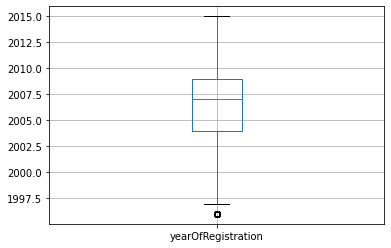

In [46]:
year_boxplot = autos_filtered_df.boxplot(column = ['yearOfRegistration'])
year_boxplot

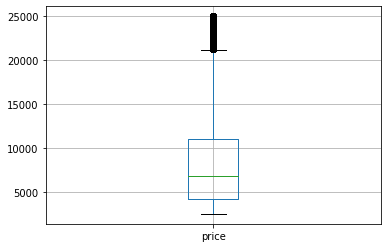

In [47]:
price_boxplot = autos_filtered_df.boxplot(column = ['price'])
price_boxplot

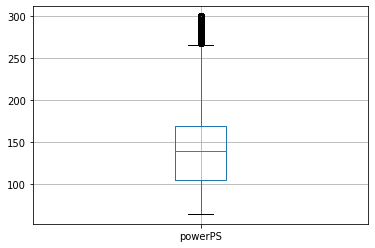

In [48]:
power_boxplot = autos_filtered_df.boxplot(column = ['powerPS'])
power_boxplot

## 4. Заполнить пропущенные данные в строковых полях.

In [49]:
autos_filled_df = autos_df.fillna(value = 'EMPTY')
autos_filled_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,EMPTY,1993,manuell,0,golf,150000,0,benzin,volkswagen,EMPTY,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,EMPTY,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,EMPTY,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,EMPTY,2005,EMPTY,0,EMPTY,20000,1,EMPTY,sonstige_autos,EMPTY,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,EMPTY,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


## 5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.

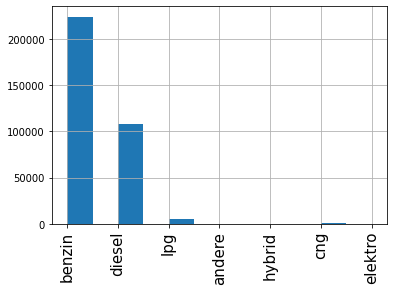

In [50]:
autos_df.fuelType.hist(bins = 12, xrot = 90, xlabelsize = 15)

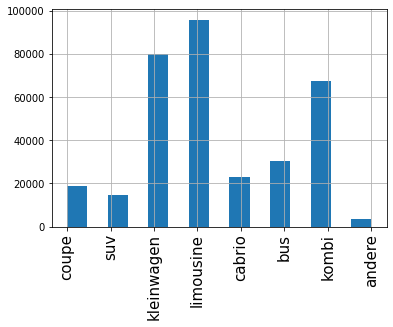

In [32]:
autos_df.vehicleType.hist(bins = 15, xrot = 90, xlabelsize = 15)

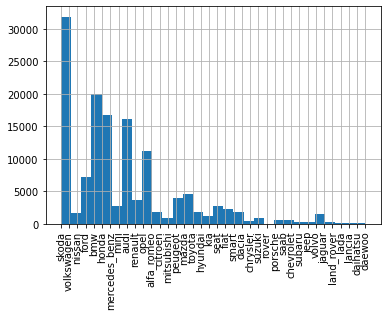

In [53]:
autos_filtered_df.brand.hist(bins = 30, xrot = 90, xlabelsize = 10)

## 6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.

In [66]:
def len(name):
    return name.str.len()
name_len_df = autos_df
name_len_df['carLength'] = len(autos_df['name'].astype('str'))
autos_len_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,carLength
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,...,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,10
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,20
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,30
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,18
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,...,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52,26
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,...,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12,37
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,...,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26,34
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,...,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21,22


## 7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.

In [72]:
import seaborn as sn
autos_corr_df = autos_filtered_df.corr()
autos_corr_df

,price,yearOfRegistration,powerPS,kilometer
price,1.000000,0.607787,0.410159,-0.410548
yearOfRegistration,0.607787,1.000000,-0.129498,-0.560267
powerPS,0.410159,-0.129498,1.000000,0.236088
kilometer,-0.410548,-0.560267,0.236088,1.000000


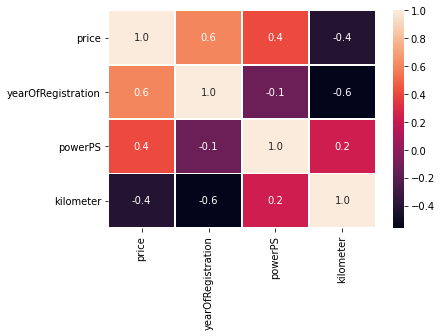

In [74]:
sn.heatmap(autos_corr_df, annot = True, fmt = '.1f', linewidths = .5)

## 8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.

In [76]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder

In [83]:
auto_df = autos_df.dropna()
label_encoder = LabelEncoder()
vehicleCoder = pd.Series(label_encoder.fit_transform(auto_df.vehicleType))
pearson = pearsonr(auto_df.price,vehicleCoder)
spearman = spearmanr(auto_df.price,vehicleCoder)

In [86]:
print('Коэффициент Пирсона: ' + str(pearson))
print('Коэффициент Спримена: ' + str(spearman))

Коэффициент Пирсона: (-1.6334189529868426e-05, 0.9933424545641987)
Коэффициент Спримена: SpearmanrResult(correlation=0.04084997836330809, pvalue=8.784062960223092e-97)


In [87]:
if spearman[1] < 0.05:
    print('p-value is good')
else:
    print('p-value is not good')

p-value is good


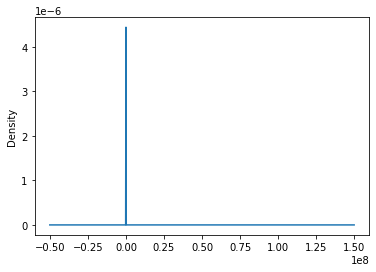

In [88]:
auto_df.price.plot.kde()

## 9. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [97]:
sum_of_signs = auto_df
sum_of_signs['sumOfSigns'] = sum_of_signs['brand'] + ' ' + sum_of_signs['model']
sum_of_signs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,carLength,sumOfSigns
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,18,volkswagen golf
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,30,skoda fabia
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,...,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07,50,bmw 3er
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,...,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39,27,peugeot 2_reihe
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,...,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58,28,volkswagen andere
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,2016-03-19 19:53:49,turbo_defekt,privat,Angebot,3200,control,limousine,2004,manuell,225,...,5,benzin,seat,ja,2016-03-19 00:00:00,0,96465,2016-03-19 20:44:43,12,seat leon
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150,control,bus,2000,manuell,0,...,3,benzin,opel,nein,2016-03-27 00:00:00,0,26624,2016-03-29 10:17:23,34,opel zafira
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,...,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12,37,smart fortwo
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,...,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26,34,volkswagen transporter
